In [4]:
import requests as rs
from bs4 import BeautifulSoup as bs
import pandas as pd

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import ElementClickInterceptedException, NoSuchElementException
import time
service=Service("D:\chromedriver\chromedriver-win64\chromedriver.exe")
driver = webdriver.Chrome(service=service)
driver.get("https://www.imdb.com/search/title/?title_type=feature&release_date=2024-01-01,2024-12-31&languages=ta")
while True:
    try:
        show_more=driver.find_element(By.XPATH,"//button//*[contains(text(),'more')]/..")
        show_more.click()
        time.sleep(2)
    except NoSuchElementException:
        print("No more show more button")
        break
    except ElementClickInterceptedException:
        time.sleep(0.5)

html=driver.page_source

soup = bs(html,'html.parser')

#print(soup)
movies=[]

movie_divs = soup.find_all('li', class_=lambda x: x and 'ipc-metadata-list-summary-item' in x)
print(len(movie_divs))
#print(movie_divs)

for movie in movie_divs:
     h3_tag=movie.find('h3')
     title=h3_tag.text if h3_tag else "N/a"
     clean_title=title.strip('1234567890.')
     metadata_div=movie.find('div',class_='dli-title-metadata')
     #print(metadata_div.prettify())
     #print(clean_title)
     if metadata_div:
         spans=metadata_div.find_all('span',class_=lambda x: x and 'dli-title-metadata' in x)
         year=spans[0].text.strip() if len(spans)>0 else "N/a"
         runtime= spans[1].text.strip() if len(spans)>1 else "N/a"
         censor_rating = spans[2].text.strip() if len(spans)>2 else "N/a"
         #print(year,runtime,censor_rating)
     else:
         print("N/A N/A N/A")
     rating_div = movie.find('div', class_=lambda x: x and 'dli-ratings-container' in x)
     if rating_div:
         spans=rating_div.find_all('span',class_= lambda x: x and "ipc-rating-star--rating")
         Imdb_rating = spans[0].text.strip() if len(spans)>0 else "N/a"
         temp=Imdb_rating.split()
         #print(temp)
         Imdb=temp[0]
         voters_list=temp[1].strip('()') if len(temp)>1 else 'N/a'
         #print(Imdb,voters_list)
     else:
         print("N/a")
     desc_div=movie.find('div',lambda x: x and 'ipc-html-content-inner-div' in x)
     if desc_div:
         summary=desc_div.text.strip()
         #print(summary)
     else:
         print("N/a")
     movies_info=({
         'Title':clean_title,
         'Year':year,
         "RunTime":runtime,
         "Censor Rating":censor_rating,
         "IMDB RATING":Imdb,
         "No Of Voters Voted ":voters_list,
         "Description":summary
                       })
     movies.append(movies_info)

InvalidSessionIdException: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: chrome=142.0.7444.60); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#invalidsessionidexception
Stacktrace:
Symbols not available. Dumping unresolved backtrace:
	0x7ff6fcc47a35
	0x7ff6fcc47a90
	0x7ff6fc9c16ad
	0x7ff6fc9ad1c5
	0x7ff6fc9d2a5a
	0x7ff6fca4a306
	0x7ff6fca6b222
	0x7ff6fca0b068
	0x7ff6fca0be93
	0x7ff6fcf029d0
	0x7ff6fcefce50
	0x7ff6fcf1cc45
	0x7ff6fcc630ce
	0x7ff6fcc6adbf
	0x7ff6fcc50c14
	0x7ff6fcc50dcf
	0x7ff6fcc36828
	0x7ff85595e8d7
	0x7ff85740c53c


In [1]:
#df=pd.DataFrame(movies)
import pandas as pd
df=pd.read_csv(r"D:\Data Analyst\my project\Movies_list.csv")
#df.to_csv("D:\Data Analyst\my project\Movies_list.csv",index=False)

In [ ]:
with open("D:\Data Analyst\my project\sample.html",'r',encoding='utf-8') as f:
    data =f.read()
a=bs(data,'html.parser')
print(a.prettify())
b=a.find('div').get('class')
#print(a.find('div'))
print(''.join(b))
#t=a.find('h3').get('class')
#print(t)


In [ ]:
!pip install selenium

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import ElementClickInterceptedException, NoSuchElementException
import time
service=Service("D:\chromedriver\chromedriver-win64\chromedriver.exe")
driver = webdriver.Chrome(service=service)
driver.get("https://www.imdb.com/search/title/?title_type=feature&release_date=2024-01-01,2024-12-31&languages=ta")
while True:
    try:
        show_more=driver.find_element(By.XPATH,"//button//*[contains(text(),'more')]/..")
        show_more.click()
        time.sleep(2)
    except NoSuchElementException:
        print("No more show more button")
        break
    except ElementClickInterceptedException:
        time.sleep(0.5)

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
df

,Title,Year,RunTime,Censor Rating,IMDB RATING,No Of Voters Voted,Description
0,Mahavatar Narsimha,2024,2h 10m,TV-14,8.7,42K,The demon Hiranyakashyap seeks revenge on Vishnu and declares himself a god. His son Prahlad remains devoted to Vishnu. Vishnu manifests as Narsimha to defeat the demon and restore balance.
1,Maharaja,2024,2h 21m,N/a,8.3,76K,"A barber seeks vengeance after his home is burglarized, cryptically telling police his ""lakshmi"" has been taken, leaving them uncertain if it's a person or object. His quest to recover the elusive ""lakshmi"" unfolds."
2,Bramayugam,2024,2h 19m,N/a,7.7,16K,"Thevan, a folk singer of the Paanan caste, has a fateful encounter when escaping slavery, leading to him discovering an ancient traditional mansion altering his destiny."
3,Manjummel Boys,2024,2h 15m,N/a,8.2,31K,"A group of friends get into a daring rescue mission to save their friend from Guna Caves, a perilously deep pit from where nobody has ever been brought back."
4,Amaran,2024,2h 47m,N/a,8.1,22K,"The life of Major Mukund Varadarajan and is set against the backdrop of the Qazipathri Operation in Shopian, Kashmir, which took place back in 2014."
...,...,...,...,...,...,...,...
267,Nodigalal Naam Karaiya,2024,N/a,N/a,Rate,N/a,"Abinash's brother is suddenly kidnapped. With his friend Dishore,he investigates, facing threats and dead ends. Clues point to someone close. In a tense climax, the kidnapper is revealed-and the fate of his brother leaves a lasting impact."
268,Mayaperulagam,2024,N/a,N/a,Rate,N/a,"Abinash's brother is suddenly kidnapped. With his friend Dishore,he investigates, facing threats and dead ends. Clues point to someone close. In a tense climax, the kidnapper is revealed-and the fate of his brother leaves a lasting impact."
269,Tranzindia Escape from Mlm Its Me Prasanna,2024,N/a,N/a,Rate,N/a,"Abinash's brother is suddenly kidnapped. With his friend Dishore,he investigates, facing threats and dead ends. Clues point to someone close. In a tense climax, the kidnapper is revealed-and the fate of his brother leaves a lasting impact."
270,Journey,2024,1h 5m,N/a,Rate,N/a,"A team of academic researchers, theatre and film practitioners meet women survivors of the violence that occurred during the Sri Lankan civil war (1983-2009). The women share their stories, at times contemplative and elegiac, at other times invoking the vengeance of the Goddess Kannagi. We learn that these extraordinary women have survived immense trauma yet also risen out of their desperation to re-work their relationships with family and community. But their journey never follows a straight line."


In [2]:
df1=df.drop_duplicates()
df

,Title,Year,RunTime,Censor Rating,IMDB RATING,No Of Voters Voted,Description
0,Mahavatar Narsimha,2024,2h 10m,TV-14,8.7,42K,The demon Hiranyakashyap seeks revenge on Vish...
1,Maharaja,2024,2h 21m,N/a,8.3,76K,A barber seeks vengeance after his home is bur...
2,Bramayugam,2024,2h 19m,N/a,7.7,16K,"Thevan, a folk singer of the Paanan caste, has..."
3,Manjummel Boys,2024,2h 15m,N/a,8.2,31K,A group of friends get into a daring rescue mi...
4,Amaran,2024,2h 47m,N/a,8.1,22K,The life of Major Mukund Varadarajan and is se...
...,...,...,...,...,...,...,...
267,Nodigalal Naam Karaiya,2024,N/a,N/a,Rate,N/a,Abinash's brother is suddenly kidnapped. With ...
268,Mayaperulagam,2024,N/a,N/a,Rate,N/a,Abinash's brother is suddenly kidnapped. With ...
269,Tranzindia Escape from Mlm Its Me Prasanna,2024,N/a,N/a,Rate,N/a,Abinash's brother is suddenly kidnapped. With ...
270,Journey,2024,1h 5m,N/a,Rate,N/a,"A team of academic researchers, theatre and fi..."


In [3]:
print(df1.dtypes)

Title                  object
Year                    int64
RunTime                object
Censor Rating          object
IMDB RATING            object
No Of Voters Voted     object
Description            object
dtype: object


In [4]:
df1['IMDB RATING']=pd.to_numeric(df1['IMDB RATING'],errors='coerce')

In [5]:
df1['Title']=df['Title'].astype('str')

In [6]:
def convert_num_people(x):
    if isinstance(x,str):
        x=x.replace(',',"").replace(' ','')
        if 'k' in x.lower():
            return float(x.lower().replace('k',''))*1000
        elif 'm' in x.lower():
            return float(x.lower().replace('m',''))*1000000
        else:
            try:
                return(float(x))
            except:
                return pd.NA
    else:
        return x
        

In [7]:
df1['No Of Voters Voted ']=df1['No Of Voters Voted '].apply(convert_num_people)

In [8]:
print(df1.columns)

Index(['Title', 'Year', 'RunTime', 'Censor Rating', 'IMDB RATING',
       'No Of Voters Voted ', 'Description'],
      dtype='object')


In [9]:
df1

,Title,Year,RunTime,Censor Rating,IMDB RATING,No Of Voters Voted,Description
0,Mahavatar Narsimha,2024,2h 10m,TV-14,8.7,42000.0,The demon Hiranyakashyap seeks revenge on Vish...
1,Maharaja,2024,2h 21m,N/a,8.3,76000.0,A barber seeks vengeance after his home is bur...
2,Bramayugam,2024,2h 19m,N/a,7.7,16000.0,"Thevan, a folk singer of the Paanan caste, has..."
3,Manjummel Boys,2024,2h 15m,N/a,8.2,31000.0,A group of friends get into a daring rescue mi...
4,Amaran,2024,2h 47m,N/a,8.1,22000.0,The life of Major Mukund Varadarajan and is se...
...,...,...,...,...,...,...,...
267,Nodigalal Naam Karaiya,2024,N/a,N/a,NaN,<NA>,Abinash's brother is suddenly kidnapped. With ...
268,Mayaperulagam,2024,N/a,N/a,NaN,<NA>,Abinash's brother is suddenly kidnapped. With ...
269,Tranzindia Escape from Mlm Its Me Prasanna,2024,N/a,N/a,NaN,<NA>,Abinash's brother is suddenly kidnapped. With ...
270,Journey,2024,1h 5m,N/a,NaN,<NA>,"A team of academic researchers, theatre and fi..."


In [10]:
df1['No Of Voters Voted ']=df1['No Of Voters Voted '].astype('Int64')

In [11]:
print((df1['Censor Rating']=="N/a").sum())

269


In [12]:
df2=df1.drop(columns=['Censor Rating'])

In [13]:
df2

,Title,Year,RunTime,IMDB RATING,No Of Voters Voted,Description
0,Mahavatar Narsimha,2024,2h 10m,8.7,42000,The demon Hiranyakashyap seeks revenge on Vish...
1,Maharaja,2024,2h 21m,8.3,76000,A barber seeks vengeance after his home is bur...
2,Bramayugam,2024,2h 19m,7.7,16000,"Thevan, a folk singer of the Paanan caste, has..."
3,Manjummel Boys,2024,2h 15m,8.2,31000,A group of friends get into a daring rescue mi...
4,Amaran,2024,2h 47m,8.1,22000,The life of Major Mukund Varadarajan and is se...
...,...,...,...,...,...,...
267,Nodigalal Naam Karaiya,2024,N/a,NaN,<NA>,Abinash's brother is suddenly kidnapped. With ...
268,Mayaperulagam,2024,N/a,NaN,<NA>,Abinash's brother is suddenly kidnapped. With ...
269,Tranzindia Escape from Mlm Its Me Prasanna,2024,N/a,NaN,<NA>,Abinash's brother is suddenly kidnapped. With ...
270,Journey,2024,1h 5m,NaN,<NA>,"A team of academic researchers, theatre and fi..."


In [35]:
#print(df2['Description'].isnull().sum())
df2.rename(columns={'No Of Voters Voted ':'Count Of Reviewers'},inplace=True)
print(df2.columns)

Index(['Title', 'Year', 'RunTime', 'IMDB RATING', 'Count Of Reviewers',
       'Description'],
      dtype='object')


In [36]:
#print(df2['RunTime'].unique())
#print(df2['Description'].str.startswith(' ').any())
#print(df2['Description'].str.endswith(' ').any())
print(df2['Title'].value_counts())

Title
Poem Of The Wind               1
Dak Dik Dos                    1
Mahendranin Ponnu Mappillai    1
Poiyazhagans                   1
Orea Peachu Orea Mudivu        1
                              ..
Amaran                         1
Manjummel Boys                 1
Bramayugam                     1
Maharaja                       1
Mahavatar Narsimha             1
Name: count, Length: 272, dtype: int64


In [37]:
print(df2.dtypes)

Title                  object
Year                    int64
RunTime                object
IMDB RATING           float64
Count Of Reviewers      Int64
Description            object
dtype: object


In [38]:
df2['Title']=df2['Title'].str.strip().str.title()

In [39]:
#print(df2['Title'].str.startswith(' ').any())
#print(df2['Title'].str.endswith(' ').any())

In [40]:
print(df2['IMDB RATING'].describe())


count    222.000000
mean       6.475676
std        1.518288
min        2.800000
25%        5.300000
50%        6.500000
75%        7.700000
max        9.500000
Name: IMDB RATING, dtype: float64


In [41]:
print(df2['RunTime'].describe())

count     272
unique     79
top       N/a
freq       46
Name: RunTime, dtype: object


In [42]:
df3=df2.drop(columns=['Description'])

In [43]:
df3

,Title,Year,RunTime,IMDB RATING,Count Of Reviewers
0,Mahavatar Narsimha,2024,2h 10m,8.7,42000
1,Maharaja,2024,2h 21m,8.3,76000
2,Bramayugam,2024,2h 19m,7.7,16000
3,Manjummel Boys,2024,2h 15m,8.2,31000
4,Amaran,2024,2h 47m,8.1,22000
...,...,...,...,...,...
267,Nodigalal Naam Karaiya,2024,N/a,NaN,<NA>
268,Mayaperulagam,2024,N/a,NaN,<NA>
269,Tranzindia Escape From Mlm Its Me Prasanna,2024,N/a,NaN,<NA>
270,Journey,2024,1h 5m,NaN,<NA>


In [44]:
df4=df3.drop(columns=['Year'])

In [45]:
df4

,Title,RunTime,IMDB RATING,Count Of Reviewers
0,Mahavatar Narsimha,2h 10m,8.7,42000
1,Maharaja,2h 21m,8.3,76000
2,Bramayugam,2h 19m,7.7,16000
3,Manjummel Boys,2h 15m,8.2,31000
4,Amaran,2h 47m,8.1,22000
...,...,...,...,...
267,Nodigalal Naam Karaiya,N/a,NaN,<NA>
268,Mayaperulagam,N/a,NaN,<NA>
269,Tranzindia Escape From Mlm Its Me Prasanna,N/a,NaN,<NA>
270,Journey,1h 5m,NaN,<NA>


In [46]:
import re
def time_to_minutes(s):
    if pd.isna(s):
        return "None"
    s=str(s).lower().replace(" ","")
    hours=0
    minutes=0
    h_match=re.search(r'(\d+)h',s)
    if h_match:
        hours = int(h_match.group(1))
    m_match=re.search('(\d+)(min|mins|m)',s)
    if m_match:
        minutes = int(m_match.group(1))
    return (hours*60+ minutes)

In [47]:
df4['RunTime']=df4["RunTime"].apply(time_to_minutes)

In [48]:
df4['RunTime']=df4['RunTime'].astype(str)+'m'

In [49]:
df4['RunTime']=df4['RunTime'].replace('NONE',"N/a")

In [50]:
df4

,Title,RunTime,IMDB RATING,Count Of Reviewers
0,Mahavatar Narsimha,130m,8.7,42000
1,Maharaja,141m,8.3,76000
2,Bramayugam,139m,7.7,16000
3,Manjummel Boys,135m,8.2,31000
4,Amaran,167m,8.1,22000
...,...,...,...,...
267,Nodigalal Naam Karaiya,0m,NaN,<NA>
268,Mayaperulagam,0m,NaN,<NA>
269,Tranzindia Escape From Mlm Its Me Prasanna,0m,NaN,<NA>
270,Journey,65m,NaN,<NA>


In [58]:
import numpy as np
df4.replace('N/a',np.nan,inplace=True)

In [57]:
df4["RunTime"]=df4["RunTime"].replace('0m','N/a')

In [59]:
df4=df4.dropna(how='all',subset=['RunTime','IMDB RATING','Count Of Reviewers'])

In [101]:
df4

,Title,RunTime,IMDB RATING,Count Of Reviewers
0,Mahavatar Narsimha,130m,8.7,42000
1,Maharaja,141m,8.3,76000
2,Bramayugam,139m,7.7,16000
3,Manjummel Boys,135m,8.2,31000
4,Amaran,167m,8.1,22000
...,...,...,...,...
263,The Silent Prayer,53m,NaN,<NA>
264,Combat Code: Hunt,76m,7.8,21
265,Yean Yeathuku Yeppadi From Dishoreabinash,49m,NaN,<NA>
270,Journey,65m,NaN,<NA>


In [102]:
df5=df4.reset_index(drop=True)

In [103]:
df5

,Title,RunTime,IMDB RATING,Count Of Reviewers
0,Mahavatar Narsimha,130m,8.7,42000
1,Maharaja,141m,8.3,76000
2,Bramayugam,139m,7.7,16000
3,Manjummel Boys,135m,8.2,31000
4,Amaran,167m,8.1,22000
...,...,...,...,...
230,The Silent Prayer,53m,NaN,<NA>
231,Combat Code: Hunt,76m,7.8,21
232,Yean Yeathuku Yeppadi From Dishoreabinash,49m,NaN,<NA>
233,Journey,65m,NaN,<NA>


In [63]:
#print(df5.shape)
#print(df5.columns)
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               235 non-null    object 
 1   RunTime             226 non-null    object 
 2   IMDB RATING         222 non-null    float64
 3   Count Of Reviewers  222 non-null    Int64  
dtypes: Int64(1), float64(1), object(2)
memory usage: 7.7+ KB
None


In [104]:
print(df5.isnull().sum())

Title                  0
RunTime                9
IMDB RATING           13
Count Of Reviewers    13
dtype: int64


In [105]:
print(df5.describe())

       IMDB RATING  Count Of Reviewers
count   222.000000               222.0
mean      6.475676         2697.063063
std       1.518288         7745.150708
min       2.800000                 6.0
25%       5.300000                79.0
50%       6.500000               453.0
75%       7.700000              1700.0
max       9.500000             76000.0


In [106]:
print(df5['IMDB RATING'].value_counts().sort_index(ascending=False))

IMDB RATING
9.5    1
9.4    2
9.3    3
9.2    1
9.1    1
9.0    3
8.9    2
8.8    3
8.7    5
8.6    1
8.5    2
8.4    4
8.3    6
8.2    2
8.1    2
8.0    3
7.9    5
7.8    6
7.7    5
7.6    1
7.5    2
7.4    2
7.3    5
7.2    4
7.1    9
7.0    8
6.9    7
6.8    6
6.7    4
6.6    5
6.5    6
6.4    4
6.3    4
6.2    5
6.1    8
6.0    5
5.9    5
5.8    1
5.7    5
5.6    3
5.5    5
5.4    4
5.3    4
5.2    4
5.1    4
5.0    7
4.9    3
4.8    1
4.7    1
4.6    2
4.5    8
4.4    4
4.3    3
4.2    5
4.0    3
3.8    3
3.7    1
3.2    1
3.0    1
2.8    2
Name: count, dtype: int64


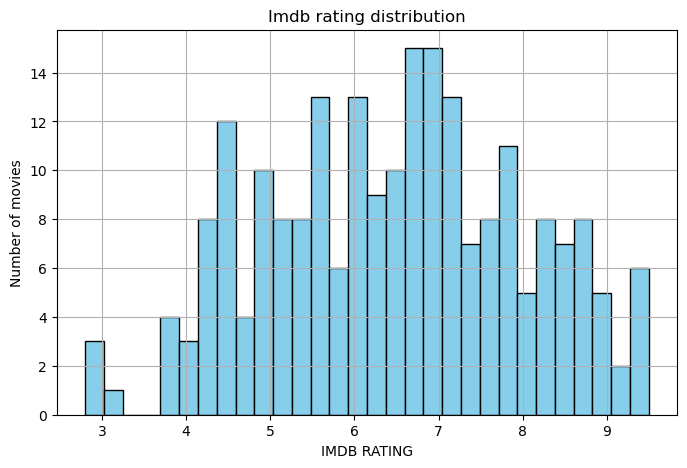

In [80]:
import matplotlib.pyplot as plt
df5['IMDB RATING'].hist(bins=30,color='skyblue',edgecolor='black',figsize=(8,5))
plt.title('Imdb rating distribution')
plt.xlabel('IMDB RATING')
plt.ylabel('Number of movies')
plt.show()

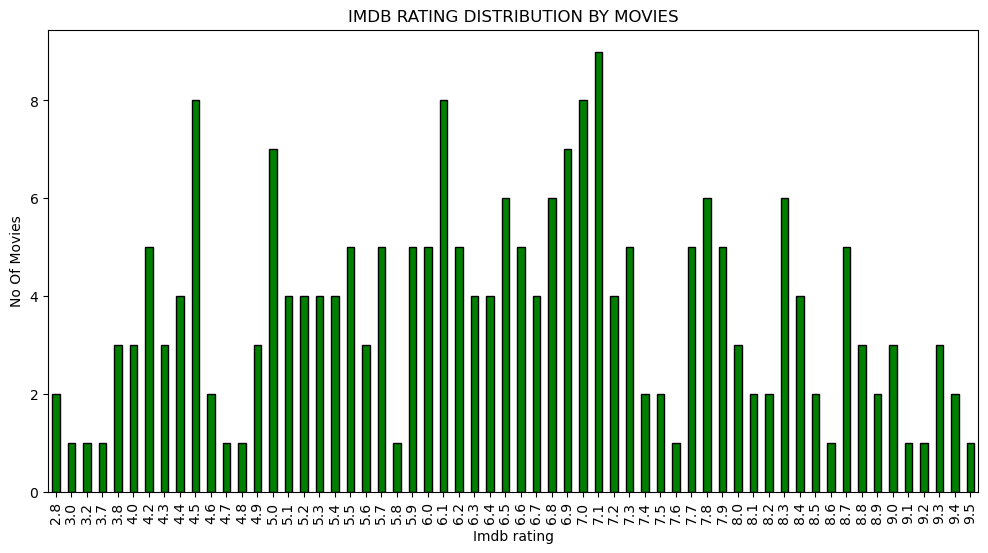

In [107]:
df5['IMDB RATING'].value_counts().sort_index().plot(kind='bar',figsize=(12,6),color="green",edgecolor='black')
plt.title("IMDB RATING DISTRIBUTION BY MOVIES")
plt.ylabel('No Of Movies')
plt.xlabel('Imdb rating')
plt.show()

<Axes: xlabel='RunTime', ylabel='IMDB RATING'>

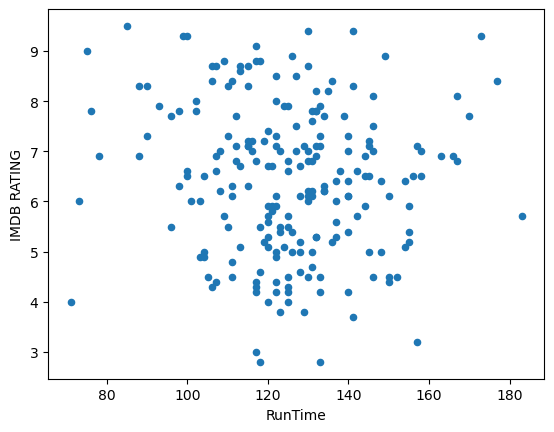

In [114]:
df6.plot.scatter(x='RunTime',y='IMDB RATING')

In [109]:
df6=df5

In [112]:
df6['RunTime']=df6['RunTime'].str.replace('m','')
df6['RunTime']=pd.to_numeric(df6['RunTime'],errors='coerce')
df6['IMDB RATING']=pd.to_numeric(df6['IMDB RATING'],errors='coerce')

In [115]:
df6

,Title,RunTime,IMDB RATING,Count Of Reviewers
0,Mahavatar Narsimha,130.0,8.7,42000
1,Maharaja,141.0,8.3,76000
2,Bramayugam,139.0,7.7,16000
3,Manjummel Boys,135.0,8.2,31000
4,Amaran,167.0,8.1,22000
...,...,...,...,...
230,The Silent Prayer,53.0,NaN,<NA>
231,Combat Code: Hunt,76.0,7.8,21
232,Yean Yeathuku Yeppadi From Dishoreabinash,49.0,NaN,<NA>
233,Journey,65.0,NaN,<NA>


In [120]:
print(df6.select_dtypes(include='number').corr())

                     RunTime  IMDB RATING  Count Of Reviewers
RunTime             1.000000    -0.090739            0.337245
IMDB RATING        -0.090739     1.000000            0.127614
Count Of Reviewers  0.337245     0.127614            1.000000


In [119]:
print(df6['RunTime'].isnull().sum())

9


In [126]:
print(df6.sort_values(['Count Of Reviewers','IMDB RATING'], ascending=(False,False)).head(10))

                       Title  RunTime  IMDB RATING  Count Of Reviewers
1                   Maharaja    141.0          8.3               76000
0         Mahavatar Narsimha    130.0          8.7               42000
19                 Vettaiyan    163.0          6.9               41000
3             Manjummel Boys    135.0          8.2               31000
14           Merry Christmas    144.0          6.9               30000
8   The Greatest Of All Time    183.0          5.7               25000
4                     Amaran    167.0          8.1               22000
5                Meiyazhagan    177.0          8.4               20000
25           Viduthalai Part    170.0          7.7               18000
27                    Indian      NaN          3.8               17000


In [127]:
print(df6.sort_values(['IMDB RATING','Count Of Reviewers'], ascending=(False,False)).head(10))

                             Title  RunTime  IMDB RATING  Count Of Reviewers
175   Home Tour - A Bachelor Party     85.0          9.5                  65
221              Oozhi: A Dark Age    130.0          9.4                  21
228                   Insta Series    141.0          9.4                  20
101                     Kodaikanal    173.0          9.3                  78
38             Happy Birthday Luci     99.0          9.3                  63
193                         Kadhai    100.0          9.3                  35
201                 Rk Vellimegham      NaN          9.2                 108
120                       Angammal    117.0          9.1                  45
219              Naanum Oru Azhagi      NaN          9.0                 176
74   Nilgiris: A Shared Wilderness     75.0          9.0                  97


<Axes: xlabel='IMDB RATING'>

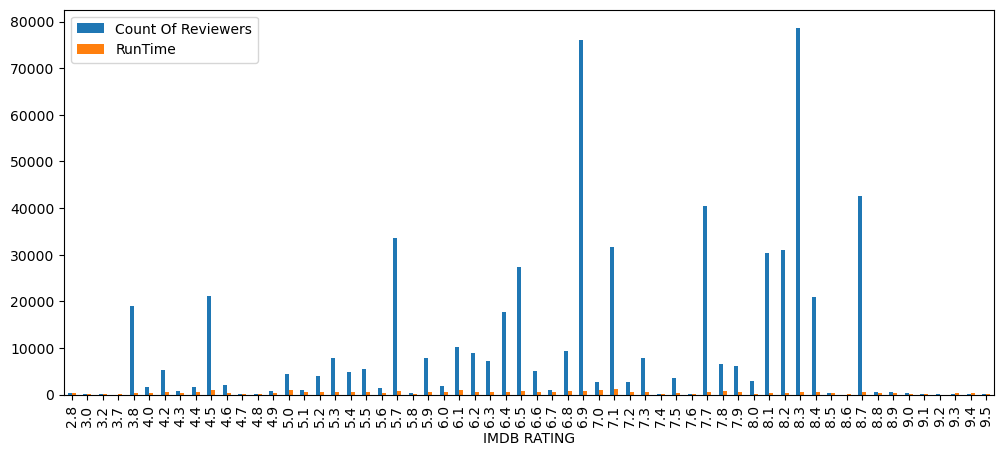

In [134]:
df6.groupby('IMDB RATING')[['Count Of Reviewers','RunTime']].sum().plot(kind='bar',figsize=(12,5))

In [135]:
print(df6[df6['IMDB RATING']>9])

                            Title  RunTime  IMDB RATING  Count Of Reviewers
38            Happy Birthday Luci     99.0          9.3                  63
101                    Kodaikanal    173.0          9.3                  78
120                      Angammal    117.0          9.1                  45
175  Home Tour - A Bachelor Party     85.0          9.5                  65
193                        Kadhai    100.0          9.3                  35
201                Rk Vellimegham      NaN          9.2                 108
221             Oozhi: A Dark Age    130.0          9.4                  21
228                  Insta Series    141.0          9.4                  20


In [139]:
print(df6[df6['Count Of Reviewers']>10000].sort_values('Count Of Reviewers',ascending=False))

                       Title  RunTime  IMDB RATING  Count Of Reviewers
1                   Maharaja    141.0          8.3               76000
0         Mahavatar Narsimha    130.0          8.7               42000
19                 Vettaiyan    163.0          6.9               41000
3             Manjummel Boys    135.0          8.2               31000
14           Merry Christmas    144.0          6.9               30000
8   The Greatest Of All Time    183.0          5.7               25000
4                     Amaran    167.0          8.1               22000
5                Meiyazhagan    177.0          8.4               20000
25           Viduthalai Part    170.0          7.7               18000
27                    Indian      NaN          3.8               17000
2                 Bramayugam    139.0          7.7               16000
11                   Kanguva    152.0          4.5               16000
16            Captain Miller    157.0          7.1               14000
13    